## Testing Query Functions

In [10]:
from query import run_query, table, plots

from lsst.rsp import get_tap_service
service = get_tap_service("ssotap")
assert service is not None

query = "SELECT mpc.q, mpc.e FROM dp03_catalog_10yr.MPCORB as mpc WHERE 

DALServiceError: 401 Client Error: Unauthorized for url: https://data.lsst.cloud/api/ssotap/tables/dp03_catalogs_10yr.SSObject

#### Testing run_query
**Required:**
- catalog: Catalog (eg. 'dp03_catalogs_10yr' or 'dp1')
  
--AND EITHER--

- class_name: Class name (eg. 'NEOs' or 'Centaurs' or 'jfcs')

--OR--

- cutoffs: Orbital constraints (eg. {'a_min': 1.0, 'a_max': 4.0} or {'Tj': True})
  
*Optional:*
- join_SSObject (bool): Join SSObject catalog.
- count_classes (bool): Print counts.
- show_table (bool): Display table.
- show_plots (bool): Display plots.
- return_astropy (bool): Return Astropy Table instead of pandas DataFrame.
- verbose (bool): Display print statements.

### Test 1: Near Earth Obejcts (NEOs)

Query MPCORB for NEOs based on their dynamical constraints & print how many the query finds.

In [2]:
neos = run_query(catalog='dp03_catalogs_10yr', class_name='NEOs', count_classes=True, verbose=True) 

Running query:
SELECT mpc.ssObjectId, mpc.mpcDesignation, mpc.e, mpc.q, mpc.incl FROM dp03_catalogs_10yr.MPCORB as mpc WHERE mpc.q <= 1.3 AND mpc.e <= 1.0 AND (1 - mpc.e) > 0 AND mpc.q / (1 - mpc.e) <= 4.0 ORDER by mpc.mpcDesignation

Job phase is: ERROR

TAP job failed. You can inspect the error at:
Could not retrieve error URL.
Exception: 'AsyncTAPJob' object has no attribute 'results_url'


RuntimeError: Query did not complete successfully.

In [1]:
table(neos, 20)

NameError: name 'table' is not defined

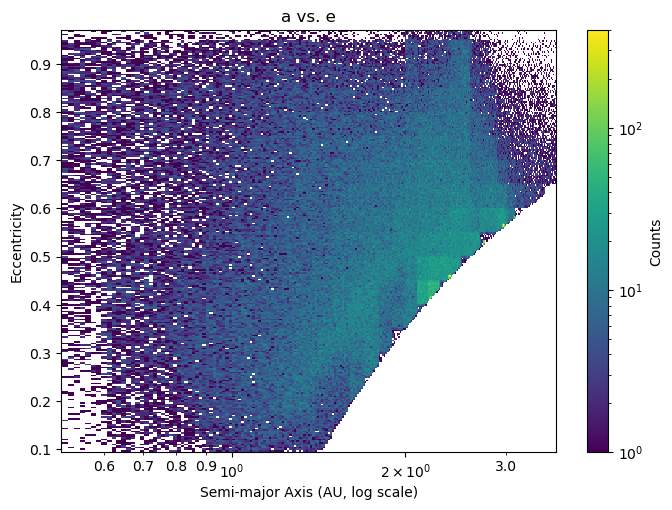

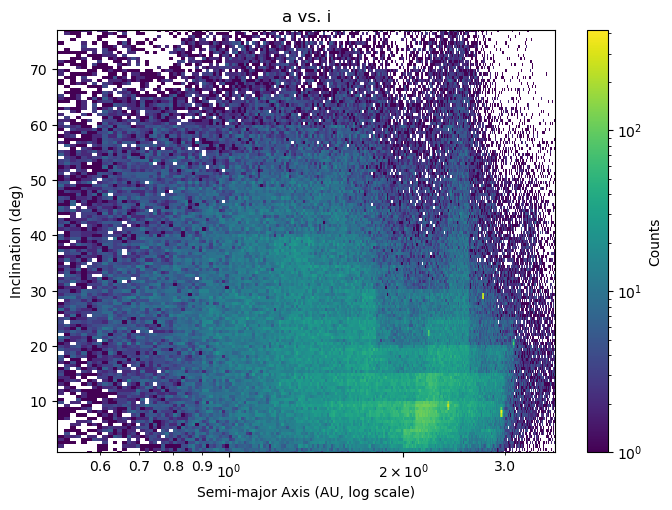

In [5]:
plots(neos)

In [6]:
neos_with_SSObject = run_query(catalog='dp03_catalogs_10yr', class_name='NEOs', join_SSObject=True, count_classes=True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']

Class count:
NEOs: 39470 objects



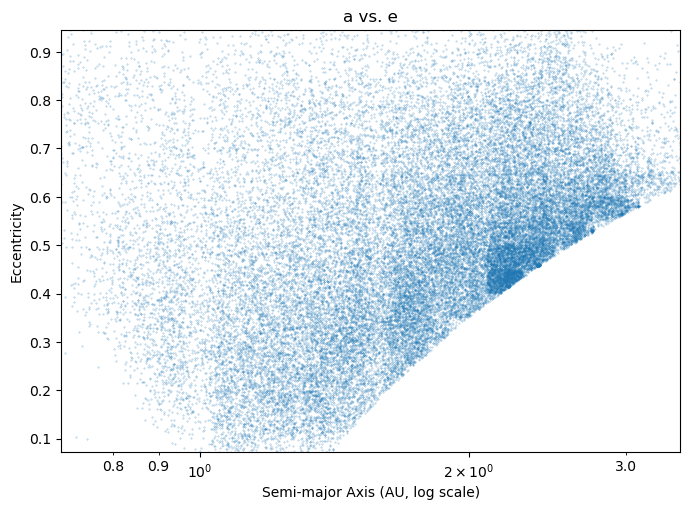

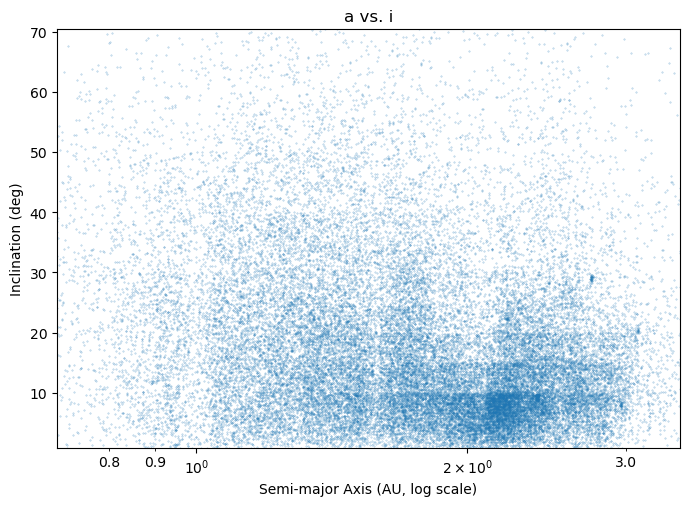

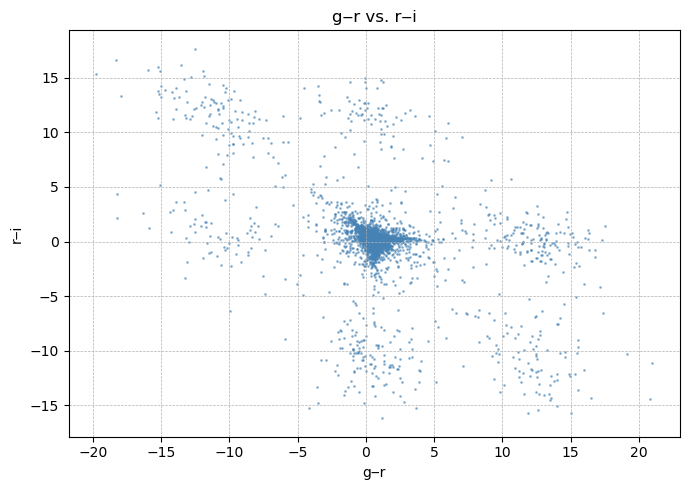

In [7]:
plots(neos_with_SSObject)

### Test 2: Main Belta Asteroids (MBAs)

In [ ]:
mbas = run_query(catalog='dp03_catalogs_10yr', class_name='MBAs', count_classes=True, verbose=True) 

In [ ]:
table(mbas, 20)

In [ ]:
plots(mbas)

In [ ]:
mbas_with_SSObject = run_query(catalog='dp03_catalogs_10yr', class_name='MBAs', join_SSObject=True, count_classes=True)

In [ ]:
plots(mbas_with_SSObject)

### Test 3: Jupiter Family Comets (JFCs)

In [4]:
jfcs = run_query(catalog='dp03_catalogs_10yr', class_name='JFCs', count_classes=True, verbose=True) 

Running query:
SELECT mpc.ssObjectId, mpc.mpcDesignation, mpc.e, mpc.q, mpc.incl FROM dp03_catalogs_10yr.MPCORB as mpc WHERE (mpc.q IS NOT NULL AND mpc.e IS NOT NULL AND mpc.e < 1.0 AND (mpc.q * (1 - mpc.e)) / (5.204 * (1 + mpc.e)) >= 0 AND ((5.204 * (1 - mpc.e)) / mpc.q + 2 * COS(RADIANS(mpc.incl)) * SQRT((mpc.q * (1 - mpc.e)) / (5.204 * (1 + mpc.e)))) BETWEEN 2.0 AND 3.0) ORDER by mpc.mpcDesignation

Job phase is: ERROR



AssertionError: Query did not complete successfully.

In [9]:
table(jfcs, 20)

,ssObjectId,mpcDesignation,e,q,incl,a
0,-3002051867512054290,1003 T-2,0.145710,2.647201,0.72745,3.098714
1,-8365056588950409896,1004 T-3,0.226934,2.312656,8.37026,2.991539
2,8582309112211663112,1006 T-2,0.120938,3.487805,4.94513,3.967646
3,5461598545076154580,1008 T-2,0.124349,2.705373,11.20681,3.089558
4,-2544184770395092401,1008 T-3,0.169675,2.583590,12.60331,3.111542
5,-5392083448274909441,1012 T-2,0.223306,2.003515,12.89792,2.579541
6,6829992985721988961,1012 T-3,0.254541,2.373449,13.81293,3.183876
7,8676271300547730239,1014 T-2,0.236068,2.330022,7.26018,3.050038
8,-7966373328027097656,1019 T-2,0.336563,1.852309,0.55946,2.791990
9,-4844615538968202573,1019 T-3,0.198994,2.560323,9.03101,3.196386


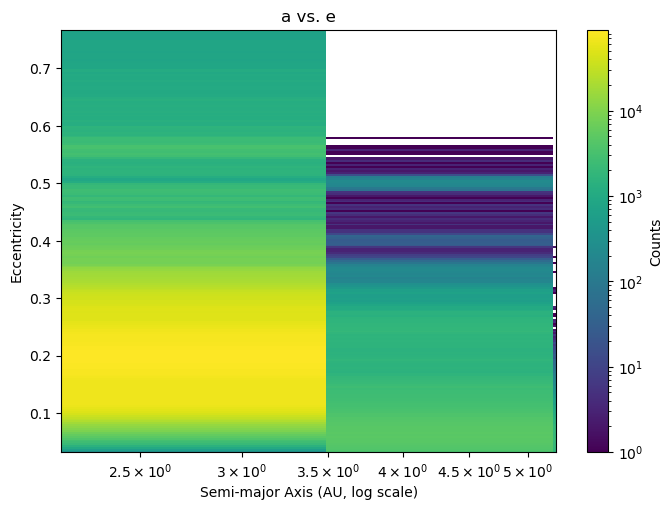

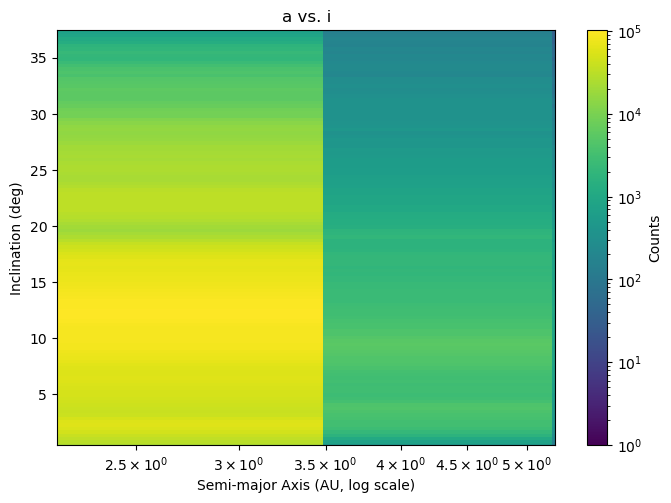

In [10]:
plots(jfcs)

In [11]:
jfcs_with_SSObject = run_query(catalog='dp03_catalogs_10yr', class_name='JFCs', join_SSObject=True, count_classes=True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']

Class count:
JFCs: 1526985 objects



In [ ]:
plots(jfcs_with_SSObject)

### Test 2: Near Earth Obejcts (MBAs)